### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
df = pd.read_csv('/content/sample_data/coupons.csv')

In [4]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
missing_values= df.isnull().sum()
missing_values

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
# drop the field Car since majority of the daya records do not have this field populated

#df=df.drop(columns=["car"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [10]:
#recheck missing values in each column
missing_values= df.isnull().sum()
missing_values

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?



In [12]:
coupon_accepted_df= df.query("Y==1").shape[0]
rowcount=df.shape[0]


print(f"proportion of the total observations chose to accept the coupon : {round((coupon_accepted_df/ rowcount) * 100 )}%")

proportion of the total observations chose to accept the coupon : 57%


5. Use a bar plot to visualize the `coupon` column.

In [13]:
### Creating a dataframe to keep accepted coupon count by coupon type

coupon_accepted_df=df.query("Y==1").groupby("coupon").agg("count")[["Y"]]
coupon_accepted_df = coupon_accepted_df.reset_index()
coupon_accepted_df

,coupon,Y
0,Bar,827
1,Carry out & Take away,1760
2,Coffee House,1995
3,Restaurant(20-50),658
4,Restaurant(<20),1970


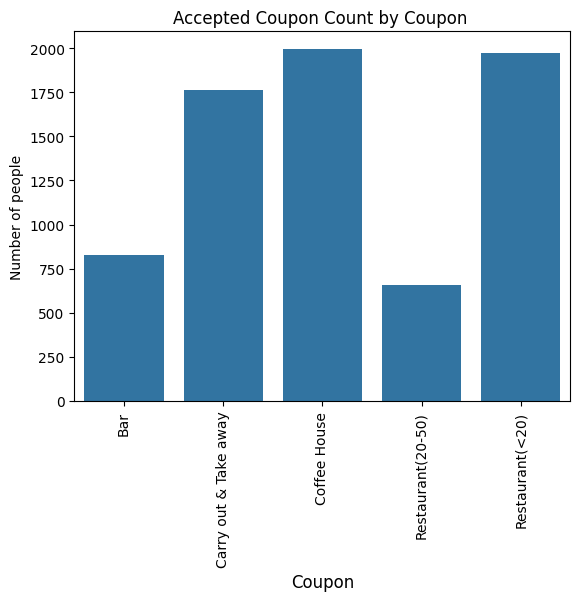

In [16]:
sns.barplot(x='coupon',y='Y' , data=coupon_accepted_df)
plt.xticks(rotation=90)
plt.xlabel('Coupon', fontsize=12)
plt.ylabel('Number of people')
plt.title('Accepted Coupon Count by Coupon ')
plt.show()

6. Use a histogram to visualize the temperature column.

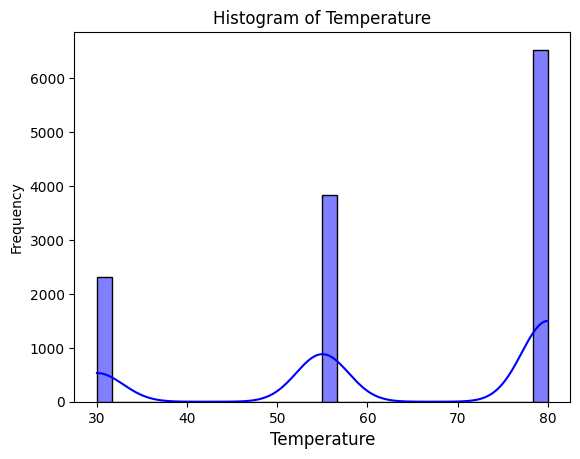

In [17]:
sns.histplot(df['temperature'],bins=30 , kde=True , color='blue')
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
#dataframe filtered for Bar coupons

bar_df= df.query("coupon == 'Bar'")
bar_df.shape

(2017, 25)

2. What proportion of bar coupons were accepted?


In [19]:
coupon_accepted_bar = bar_df.query("Y==1").shape[0]
rowcount=bar_df.shape[0]


print(f"proportion of the total observations chose to accept the coupon : {round((coupon_accepted_bar/ rowcount) * 100 )}%")

proportion of the total observations chose to accept the coupon : 41%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [21]:
# check the distinct values of Bar field from the dataframe
bar_df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

acceptance rate of divers who went to bar 1~3 : 65%
acceptance rate of divers who went to bar more than 3 times a month : 77%


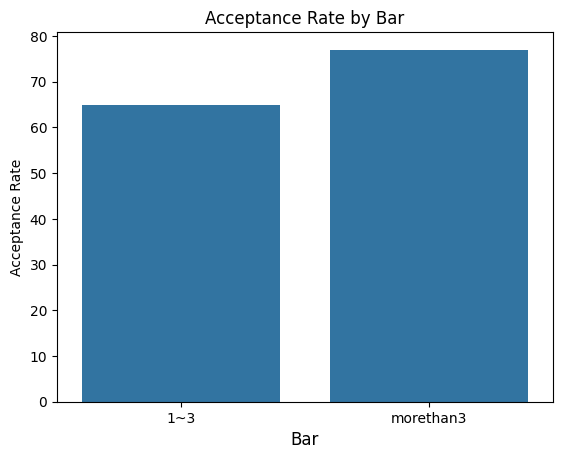

In [24]:
# drivers who went to bar 1~3 and accepted the coupon
bar_1_3_y=bar_df.query("Bar == '1~3' and Y == 1").shape[0]

#drivers who went to bar 1~3
bar_1_3 = bar_df.query("Bar == '1~3'").shape[0]

#acceptance rate of divers who went to bar 1~3
people_1_3_acceptance_rate= round((bar_1_3_y / bar_1_3) * 100 )


#drivers who went to bar more than 3 times a month and accepted the bar coupon
bar_more_than_3_y=bar_df.query("Bar in ['4~8','gt8'] and Y == 1").shape[0]

#drivers who went to bar more than 3 times a month
bar_more_than_3 = bar_df.query("Bar in ['4~8','gt8']").shape[0]

#acceptance rate of divers who went to bar more than 3 times a month
people_more_than_3_acceptance_rate= round((bar_more_than_3_y / bar_more_than_3) * 100 )

print(f"acceptance rate of divers who went to bar 1~3 : {people_1_3_acceptance_rate}%")
print(f"acceptance rate of divers who went to bar more than 3 times a month : {people_more_than_3_acceptance_rate}%")


bar_compare_dict={"Bar":['1~3','morethan3'],
                  "value": [people_1_3_acceptance_rate,people_more_than_3_acceptance_rate]}

bar_compare_df= pd.DataFrame(bar_compare_dict)

sns.barplot(x='Bar',y='value' , data=bar_compare_df)
plt.xlabel('Bar', fontsize=12)
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Bar')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
# define a function to clean and convert age values

def clean_age(age):
  if 'plus' in age:
    return int(age.replace('plus',''))
  elif 'below' in age:
    return 0 # Arbitrarily choose 0 for below 21
  else:
    return int(age)

In [34]:
#Apply the cleaning function to the age column
bar_df["cleaned_age"] = bar_df["age"].apply(clean_age)

#bar_df['cleaned_age'].unique()
#bar_df.info()

#drivers who go to a bar more than once a month and over age 25 years

drivers_morethanonce_morethan25= bar_df.query("Bar in ['1~3','4~8','gt8'] and cleaned_age > 25").shape[0]

#drivers who go to a bar more than once a month and over age 25 years and accepted the coupon
drivers_morethanonce_morethan25_accepted= bar_df.query("Bar in ['1~3','4~8','gt8'] and cleaned_age > 25 and Y == 1").shape[0]

acc_rate_drivers_morethanonce_morethan25 = round((drivers_morethanonce_morethan25_accepted / drivers_morethanonce_morethan25) * 100 )

print(f"acceptance rate of drivers who go to a bar more than once a month and over age 25 years : {acc_rate_drivers_morethanonce_morethan25}%")




acceptance rate of drivers who go to a bar more than once a month and over age 25 years : 70%


In [37]:
# create dataframe for drivers who go to a bar more than once a month and over age of 25

drivers_morethanonce_morethan25_df= bar_df.query("Bar in ['1~3','4~8','gt8'] and cleaned_age > 25")

#Merge the two data frames to find the differences
merged_df = pd.merge(left = bar_df , right =drivers_morethanonce_morethan25_df , on = ['Bar','age'] , how="left" , indicator=True )

#filter the rows that are only in Bar DF
merged_df = merged_df.query("_merge == 'left_only'").drop(columns=['_merge'])

acc_rate_all_other_drivers = round((merged_df.query("Y_x==1").shape[0] / merged_df.shape[0]) * 100 )

print(f"acceptance rate of all other drivers : {acc_rate_all_other_drivers}%")


acceptance rate of all other drivers : 34%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [38]:
# drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
bar_greater1_friends_partner_nofarming_fishing_forestry=bar_df.query("Bar in ['1~3','4~8','gt8'] and passanger not in ['Alone','Kid(s)'] and occupation not in ['farming','fishing','forestry']").shape[0]

# drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry and accepted the coupon
bar_greater1_friends_partner_nofarming_fishing_forestry_accepted=bar_df.query("Bar in ['1~3','4~8','gt8'] and passanger not in ['Alone','Kid(s)'] and occupation not in ['farming','fishing','forestry'] and Y == 1").shape[0]


#Acceptance Rate
acc_rate_bar_greater1_friends_partner_nofarming_fishing_forestry = round((bar_greater1_friends_partner_nofarming_fishing_forestry_accepted / bar_greater1_friends_partner_nofarming_fishing_forestry) * 100)

print(f"acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry : {acc_rate_bar_greater1_friends_partner_nofarming_fishing_forestry}%")

acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry : 72%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [39]:
### go to bars more than once a month, had passengers that were not a kid, and were not widowed

bar_greater1_friends_partner_notwidowed=bar_df.query("Bar in ['1~3','4~8','gt8'] and passanger not in ['Alone','Kid(s)'] and maritalStatus != 'widowed'").shape[0]

bar_greater1_friends_partner_notwidowed_accepted=bar_df.query("Bar in ['1~3','4~8','gt8'] and passanger not in ['Alone','Kid(s)'] and maritalStatus != 'widowed' and Y == 1").shape[0]

#acceptance rate
acc_rate_bar_greater1_friends_partner_notwidowed = round((bar_greater1_friends_partner_notwidowed_accepted / bar_greater1_friends_partner_notwidowed) * 100)

print(f"acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed : {acc_rate_bar_greater1_friends_partner_notwidowed}%")


acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed : 72%


In [42]:
###go to bars more than once a month and are under the age of 30

bar_greater1_ageless30=bar_df.query("Bar in ['1~3','4~8','gt8'] and cleaned_age < 30").shape[0]

bar_greater1_ageless30_accepted=bar_df.query("Bar in ['1~3','4~8','gt8'] and cleaned_age < 30 and Y == 1").shape[0]

#acceptance rate
acc_rate_bar_greater1_ageless30 = round((bar_greater1_ageless30_accepted / bar_greater1_ageless30) * 100)

print(f"Acceptance rate of drivers who go to bars more than once a month and are under the age of 30 : {acc_rate_bar_greater1_ageless30}%")

Acceptance rate of drivers who go to bars more than once a month and are under the age of 30 : 72%


In [44]:
###go to cheap restaurants more than 4 times a month and income is less than 50K

bar_df["income"].unique()
cheaprest_lowincome=bar_df.query("RestaurantLessThan20 in ['4~8','gt8']  and income  in ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'] ").shape[0]

cheaprest_lowincome_accepted=bar_df.query("RestaurantLessThan20 in ['4~8','gt8']  and income  in ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'] and Y == 1").shape[0]

#acceptance rate
acc_rate_cheaprest_lowincome = round((cheaprest_lowincome_accepted / cheaprest_lowincome) * 100)

print(f"Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K : {acc_rate_cheaprest_lowincome}%")

Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K : 45%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Observations: Drivers who are under age of 30 years and visit bars more than once a month are most likely not widowed and more like likely to accept the coupon


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  